$$
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
\def\com#1{\color{blue}{\textrm{#1}}} 
$$
# Lab 3: Dynamical Systems

- Two weeks. __Due:__ 1pm Wednesday 25th March.

- Submit your lab by dropping this notebook with your answers into `dropbox` on `pleiades`. 

- __Rename your notebook to__ `Lab3_yourLoginName.ipynb` before submitting it by dragging it onto the dropbox folder. You can confirm submission (and resubmit up to the deadline), by repreating the process. If you are asked whether to replace the file, this confirms it has been successfully submitted to the dropbox. __Please confirm your submission__.

$\com{Please leave this command for marker's comments}$

---

In [2]:
# Imports
import Pkg;
Pkg.add("Plots");
Pkg.add("LaTeXStrings");
Pkg.add("DifferentialEquations");

using Plots;
using LaTeXStrings;
using DifferentialEquations;

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


Our laser model consists of the pair of coupled ordinary differential equations

<div class="alert alert-block alert-warning">
<font color=blue>
$$\ale{
\frac{dn}{dt}&=\gamma nN-\kappa n\tag{Photons}\\
\frac{dN}{dt}&=-\gamma nN -\lambda N + p\tag{Excited atoms}
}$$
</font>
</div>

where 

- $N(t)$ is the number of atoms in the excited state.
- $n(t)$ is the number of photons in the laser cavity mode.
- $\gamma$ is the gain rate for **stimulated emission** into the cavity. This is the coherent process that creates laser light.
- $\kappa$ is the decay rate due to loss of photons through the mirror, scattering, etc.
- $\lambda$ is the decay rate due to atoms **spontaneously emitting** a photon.
- $p$ is the pump rate constant. 

# A. Steady states
1.   
   Solving the pair of coupled ordinary differential equations for our laser model, we get the following solutions: when $n = 0$, $N = \frac{p}{\lambda}$ and when $n = \frac{p}{\kappa} - \frac{\lambda}{\gamma}$, $N = \frac{\kappa}{\gamma}$
   
   The laser starts lasing when $n \geq 0$, hence, the lasing threshold, $p_c$, is:
   
   $
   \begin{align}
   n &= 0\\
   \frac{p_c}{\kappa} &= \frac{\lambda}{\gamma}\\
   p_c &= \frac{\lambda}{\gamma} \kappa\\
   \end{align}$
   
   The steady state solutions above the lasing threshold in terms of $p_c$ is: when $n = \frac{p - p_c}{\kappa}$, $N = \frac{\kappa}{\gamma}$.

2.   
   The plot of $\bar{n}\left(\frac{p}{p_c}\right)$ against $\frac{p}{p_c}$ shows that the laser only starts lasing when the pump rate is greater than or equal to the lasing threshold $p_c$. The plot was generated using the code below.

```julia
# Define constants
λ = 0.03; # Decay rate due to spontaneous emission
κ = 0.01; # Decay rate due to loss of photons
γ = 1e-4; # Gain rate for stimulated emission
p_c = (λ * κ) / γ; # Lasing threshold

n(p) = p >= p_c ? (p - p_c) / κ : 0; # n as a function of p/p_c
louder = collect(0:0.1:3); # Pump constant values, Interval: (0, 3)
plot(n, [pumpit * p_c for pumpit in louder], 
        label = L"\mathrm{\bar{n}}\left(\frac{p}{p_c}\right) = \frac{1}{\kappa}\left(\frac{p}{p_c} - p_c\right)",
        title = "Graph for A.2", xlabel = L"\textrm{Pump constant, } \frac{p}{p_c}",
        ylabel = L"\textrm{Number of photons, } \bar{n}\left(\frac{p}{p_c}\right)")
```

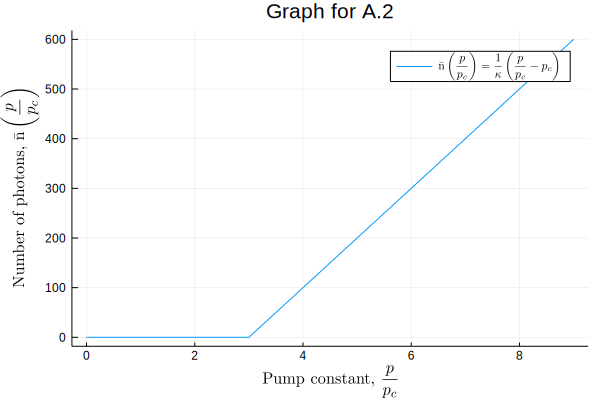

In [75]:
# Code for A.2
# Define constants
λ = 0.03; # Decay rate due to spontaneous emission
κ = 0.01; # Decay rate due to loss of photons
γ = 1e-4; # Gain rate for stimulated emission
p_c = (λ * κ) / γ; # Lasing threshold

n(p) = p >= p_c ? (p - p_c) / κ : 0; # n as a function of p/p_c
louder = collect(0:0.1:3); # Pump constant values, Interval: (0, 3)
plot(n, [pumpit * p_c for pumpit in louder], 
        label = L"\mathrm{\bar{n}}\left(\frac{p}{p_c}\right) = \frac{1}{\kappa}\left(\frac{p}{p_c} - p_c\right)",
        title = "Graph for A.2", xlabel = L"\textrm{Pump constant, } \frac{p}{p_c}",
        ylabel = L"\textrm{Number of photons, } \mathrm{\bar{n}}\left(\frac{p}{p_c}\right)")

3. A dimensionless refomulation is unnecessary in this case 

# B. Below threshold (Region I)
1.   

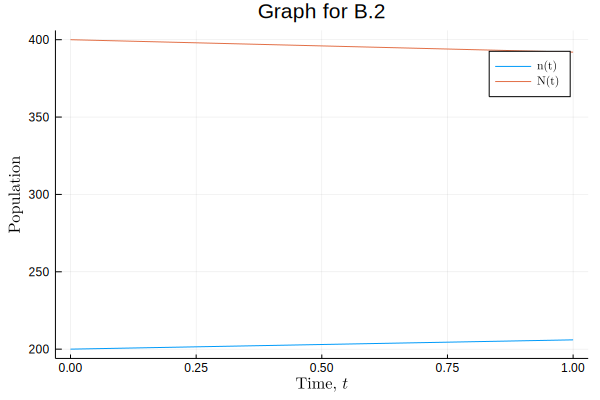

In [25]:
# Code for B.2
#p_c = (λ * κ) / γ; # Lasing threshold

function lasing!(du, u, p, t)
    n, N = u
    λ, κ, γ = p
    du[1] = dn = γ*n*N - κ*n
    du[2] = dN = -γ*n*N - λ*N + N*λ
end

p = [0.03, 0.01, 1e-4]; # Parameters
ti = 0.0; # Start time
tf = 1.0; # End time
u0 = [200.0, 400.0]; # Inital values, n(0) and N(0)
tspan = (ti, tf); # Timespan
t = LinRange(ti, tf, 500) # Number of points
prob = ODEProblem(lasing!, u0, tspan, p);
sol = solve(prob, saveat=t); # Solutions
plot(t, sol[1, :], title = "Graph for B.2", label = L"\textrm{n(t)}")
plot!(t, sol[2, :], label = L"\textrm{N(t)}")
xlabel!(L"\textrm{Time, } t")
ylabel!(L"\textrm{Population}")